# [EDA] Heatmap & Grid-scatters
可以有效的將表格型的圖進行視覺化, 常見的 Heatmap
* 相關圖
* Confusion matrix (混淆矩陣)


In [ ]:
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

# [教學目標]
- 在 EDA 中, 活用各種 Heatmap

# [範例重點]
- Heatmap 的基礎用法 : 相關矩陣的 Heatmap (In[4], Out[4])   
- Heatmap 的進階用法 : 散佈圖, KDE, 密度圖 (In[6], Out[6], In[7], Out[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './0.data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./0.data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


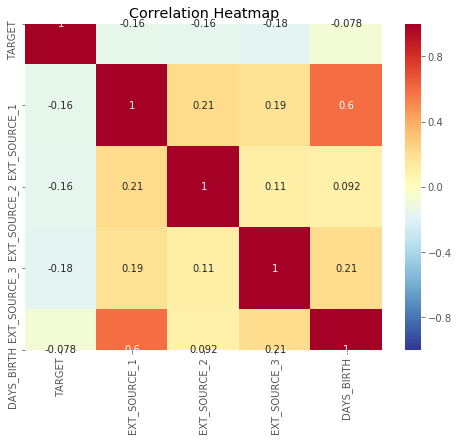

In [4]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#color map
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap');

ValueError: array must not contain infs or NaNs

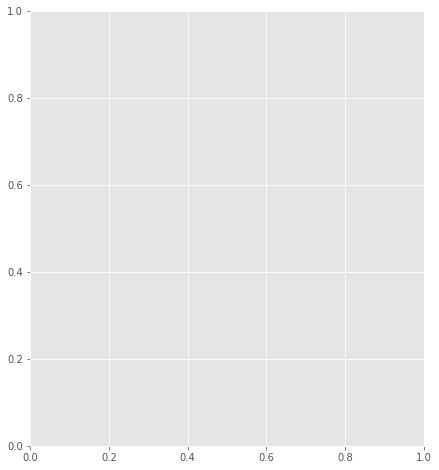

In [18]:
# 進一步我們檢查這三項變數在 Target 上的分布是否不同
plt.figure(figsize = (24, 8))

# 依不同 EXT_SOURCE 逐項繪製 KDE 圖形
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # 做 subplot
    plt.subplot(1, 3, i + 1)
    
    # KDE 圖形
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # 加上各式圖形標籤
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [9]:
app_train['TARGET'] = app_train['TARGET'].dropna()

In [ ]:
!pip list

In [ ]:
python.__version__

In [17]:
app_train['EXT_SOURCE_1'].isnull().values.any()

True

In [12]:
app_train['EXT_SOURCE_1'].dropna()

0         0.083037
1         0.311267
6         0.774761
8         0.587334
10        0.319760
            ...   
307500    0.896042
307503    0.243466
307506    0.145570
307508    0.744026
307510    0.734460
Name: EXT_SOURCE_1, Length: 134133, dtype: float64

In [16]:
app_train.dropna(subset=['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3'])


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307499,456243,0,Cash loans,F,N,Y,0,81000.000,225000.0,12694.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
307503,456247,0,Cash loans,F,N,Y,0,112500.000,345510.0,17770.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307508,456253,0,Cash loans,F,N,Y,0,153000.000,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [14]:
app_train['EXT_SOURCE_3'].dropna()

0         0.139376
2         0.729567
5         0.621226
6         0.492060
7         0.540654
            ...   
307503    0.609276
307505    0.742182
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 246546, dtype: float64

In [19]:
# 轉成以年 記齡後，將以日記齡丟掉
plot_data = ext_data.copy()
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365
plot_data.drop(['DAYS_BIRTH'], axis = 1, inplace=True)

# 定義函數 : 計算兩個 column 之間的相關係數
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

In [ ]:
"""
"""
https://www.cupoy.com/qa/club/ai_tw/0000016D6BA22D97000000016375706F795F72656C656173654B5741535354434C5542/0000016D578B8079000000CC6375706F795F72656C656173655155455354
#http://www.datasciencemadesimple.com/drop-rows-with-nan-na-drop-missing-value-in-pandas-python-2/
嗨， @明宗，我剛剛運行這一段是可以正常執行的。我從你的錯誤中看到原因是：「該行不允許空直而錯誤」，我在我的電腦上試著把那一行的資料印出的確會有空值（但也可以正常顯示）。



有可能是不同版本的問題，新版本有自帶處理空值。建議你可以：



1. 試著升級版本看看？

2. 先把資料中的 Nan 過濾後跑跑看？



有任何後續的結果或是狀況，再進一步討論囉：）



另外，附上直接執行的結果跟套件版本提供參考：



scikit-learn             0.19.1

numpy                    1.14.3

pandas                   0.20.3

scipy                    1.0.0

seaborn                  0.9.0

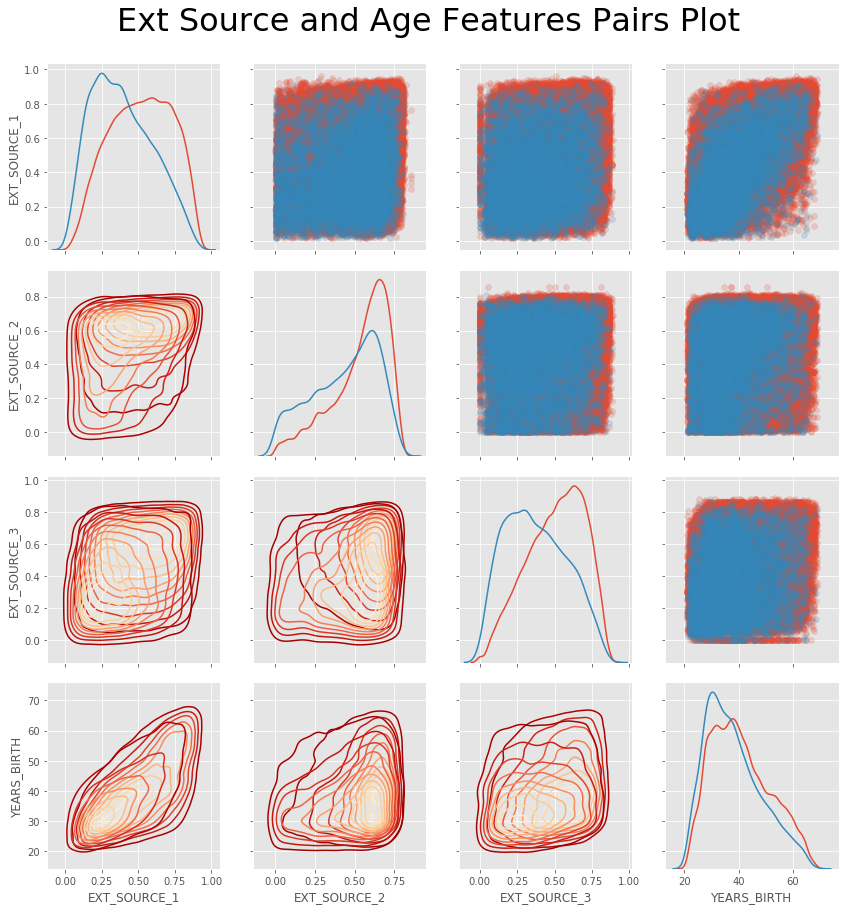

In [20]:
N_sample = 100000
# 把 NaN 數值刪去, 並限制資料上限為 100000 : 因為要畫點圖, 如果點太多，會畫很久!
plot_data = plot_data.dropna().sample(n = N_sample)

# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

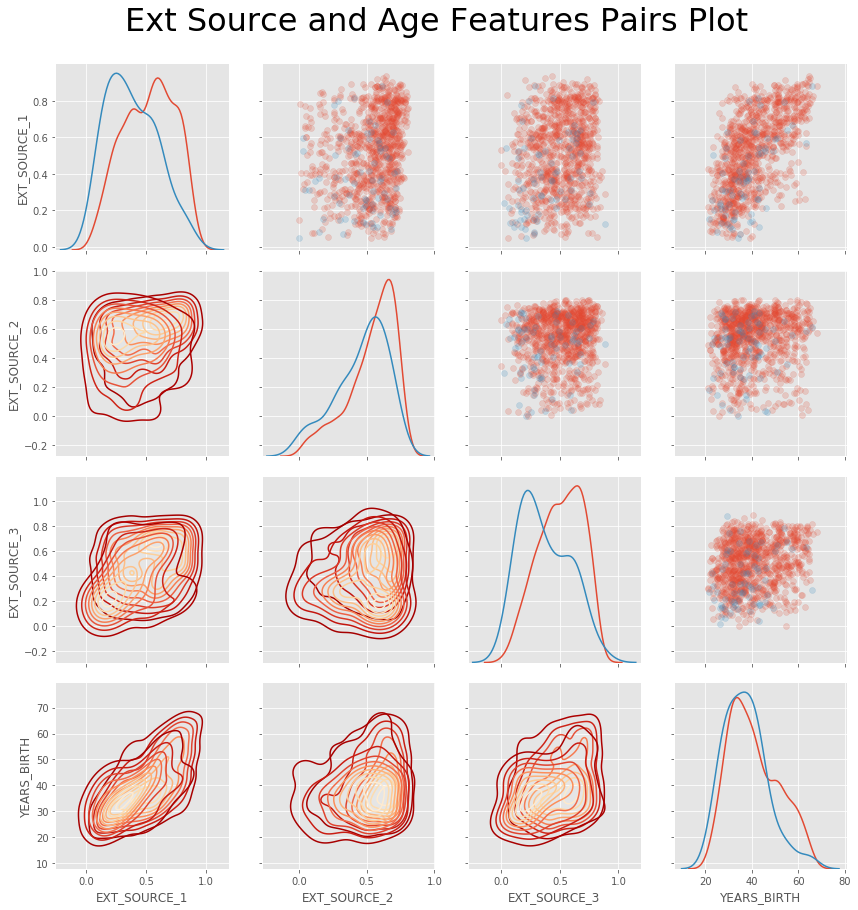

In [21]:
# 試著以不同 size 畫看看，觀察有那裡不太一樣
N_sample = 1000

plot_data = plot_data.dropna().sample(n = N_sample)

# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)